['setosa' 'versicolor' 'virginica']
Knn = ['versicolor'] [[ 0.   0.8  0.2]]
LR = ['virginica'] [[ 0.11183585  0.00264262  0.88552152]]
LDA = ['virginica'] [[  2.72188817e-19   2.85013272e-01   7.14986728e-01]]
Gauss = ['virginica'] [[  7.48712409e-100   7.37425889e-004   9.99262574e-001]]
SVC = ['virginica'] [[ 0.21663342  0.3214657   0.46190087]]
Dect = ['versicolor'] [[ 0.  1.  0.]]


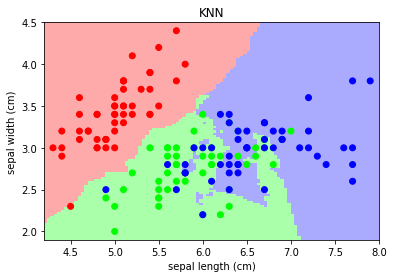

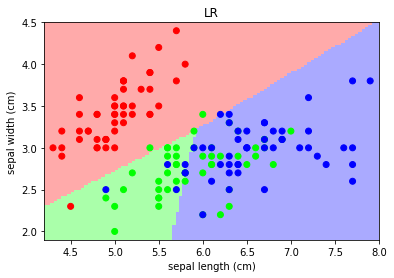

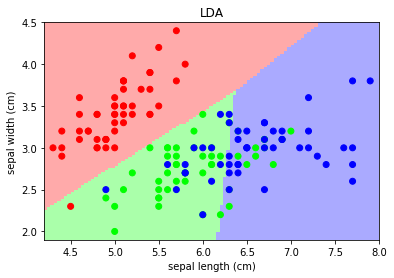

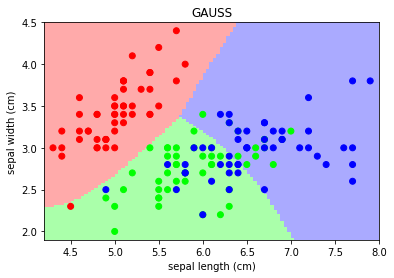

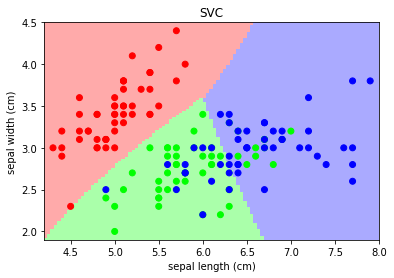

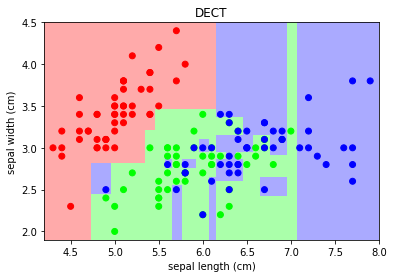

In [26]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

iris = datasets.load_iris()
#print(iris.data)
X, y = iris.data, iris.target

# create the models
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
gauss = GaussianNB()
svc = SVC(probability=True) #for displaying prob.
dect = DecisionTreeClassifier()

# fit the models
knn.fit(X, y)
lr.fit(X,y)
lda.fit(X,y)
gauss.fit(X,y)
svc.fit(X,y)
dect.fit(X,y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
X_pred = [3, 5, 4, 2]  #setosa from wikipedia dataset of iris
result1 = knn.predict([X_pred, ])
result2 = lr.predict([X_pred, ])
result3 = lda.predict([X_pred, ])
result4 = gauss.predict([X_pred, ])
result5 = svc.predict([X_pred, ])
result6 = dect.predict([X_pred, ])

#list of results
print(iris.target_names)

#print(result) and probabilities
print("Knn =",iris.target_names[result1],knn.predict_proba([X_pred, ])) #knn
print("LR =",iris.target_names[result2],lr.predict_proba([X_pred, ])) #lr
print("LDA =",iris.target_names[result3],lda.predict_proba([X_pred, ])) #lda
print("Gauss =",iris.target_names[result4],gauss.predict_proba([X_pred, ])) #gauss
print("SVC =",iris.target_names[result5],svc.predict_proba([X_pred, ])) #svc
print("Dect =",iris.target_names[result6],dect.predict_proba([X_pred, ])) #dect

#draw graphs
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
y = iris.target
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
gauss = GaussianNB()
svc = SVC(probability=True) #for displaying prob.
dect = DecisionTreeClassifier()

knn.fit(X, y)
lr.fit(X,y)
lda.fit(X,y)
gauss.fit(X,y)
svc.fit(X,y)
dect.fit(X,y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z1 = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = gauss.predict(np.c_[xx.ravel(), yy.ravel()])
Z5 = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z6 = dect.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z1 = Z1.reshape(xx.shape)
Z2 = Z2.reshape(xx.shape)
Z3 = Z3.reshape(xx.shape)
Z4 = Z4.reshape(xx.shape)
Z5 = Z5.reshape(xx.shape)
Z6 = Z6.reshape(xx.shape)

#plot knn
pl.figure()
pl.pcolormesh(xx, yy, Z1, cmap=cmap_light)
# Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')
plt.title('KNN')
pl.show()

#plot lr
pl.figure()
pl.pcolormesh(xx, yy, Z2, cmap=cmap_light)
# Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')
plt.title('LR')
pl.show()

#plot lda
pl.figure()
pl.pcolormesh(xx, yy, Z3, cmap=cmap_light)
# Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')
plt.title('LDA')
pl.show()

#plot gauss
pl.figure()
pl.pcolormesh(xx, yy, Z4, cmap=cmap_light)
# Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')
plt.title('GAUSS')
pl.show()

#plot svc
pl.figure()
pl.pcolormesh(xx, yy, Z5, cmap=cmap_light)
# Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')
plt.title('SVC')
pl.show()

#plot dect
pl.figure()
pl.pcolormesh(xx, yy, Z6, cmap=cmap_light)
# Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')
plt.title('DECT')
pl.show()
